<a href="https://colab.research.google.com/github/Pratik-Prabhakarrao/US-Consumer-Finance-Complaints-US-consumer-complaints-on-financial-products-and-company-responses/blob/main/Evaluating_Customer_Service_%7C%7C_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 6.3 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=d75109a214db4bb8c88d72bb81e09b517fb422bf9bb5025738e9b11b676b17ef
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pratikprabhakarrao","key":"ef2cc8a1efa5cc0b5fe26dd0f5c61675"}'}

In [3]:
# create kaggle directory

! mkdir ~/.kaggle/

In [4]:
# copy the kaggle.jsone to the folder created i.e kaggle

! cp kaggle.json ~/.kaggle/

In [5]:
# permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
# to list the dataset in the kaggle

! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              235KB  2021-10-01 17:39:01          13436  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           8069  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           3555  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Women                               838MB  2021-02-28 14:56:00           1534  
dhruvildave/wikibooks-dataset                               Wikibooks Datase

In [7]:
# pest the link of data from the data required

! kaggle datasets download -d kaggle/us-consumer-finance-complaints

 86% 73.0M/84.5M [00:01<00:00, 62.0MB/s]
100% 84.5M/84.5M [00:01<00:00, 69.9MB/s]


In [8]:
# importing the library

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
from wordcloud import WordCloud, STOPWORDS


In [10]:
# mount the google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# locate the file in gooogle drive

path = 'drive/My Drive/DATASETS/us-consumer-finance-complaints'

In [12]:
# import the datasets

df = pd.read_csv(path+'/consumer_complaints.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.



In [13]:
df.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555957 entries, 0 to 555956
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   date_received                 555957 non-null  object
 1   product                       555957 non-null  object
 2   sub_product                   397635 non-null  object
 3   issue                         555957 non-null  object
 4   sub_issue                     212622 non-null  object
 5   consumer_complaint_narrative  66806 non-null   object
 6   company_public_response       85124 non-null   object
 7   company                       555957 non-null  object
 8   state                         551070 non-null  object
 9   zipcode                       551452 non-null  object
 10  tags                          77959 non-null   object
 11  consumer_consent_provided     123458 non-null  object
 12  submitted_via                 555957 non-null  object
 13 

In [15]:
# cheking the first column of date received
print(df['date_received'].isnull().count())
print(df['date_received'].describe())

555957
count         555957
unique          1608
top       08/27/2015
freq             963
Name: date_received, dtype: object


In [16]:
# checking the product column
print(df['product'].isnull().count())
print(df['product'].describe())
print(df['product'].unique())


555957
count       555957
unique          11
top       Mortgage
freq        186475
Name: product, dtype: object
['Mortgage' 'Credit reporting' 'Student loan' 'Debt collection'
 'Credit card' 'Bank account or service' 'Consumer Loan' 'Money transfers'
 'Payday loan' 'Prepaid card' 'Other financial service']


In [17]:
df['product'].value_counts()

Mortgage                   186475
Debt collection            101052
Credit reporting            91854
Credit card                 66468
Bank account or service     62563
Consumer Loan               20990
Student loan                15839
Payday loan                  3877
Money transfers              3812
Prepaid card                 2470
Other financial service       557
Name: product, dtype: int64

In [18]:
p_product_dicsussion = round(df['product'].value_counts()/ len(df['product']) * 100, 2)
p_product_dicsussion

Mortgage                   33.54
Debt collection            18.18
Credit reporting           16.52
Credit card                11.96
Bank account or service    11.25
Consumer Loan               3.78
Student loan                2.85
Payday loan                 0.70
Money transfers             0.69
Prepaid card                0.44
Other financial service     0.10
Name: product, dtype: float64

In [19]:
labels = list(p_product_dicsussion.index)
values = p_product_dicsussion.values.tolist()

colors = ['#F78181', '#F5A9BC', '#2E9AFE', '#58FA58', '#FAAC58', '#088A85', '#8A0808', '#848484', '#F781F3', '#D7DF01', '#2E2EFE']

product_pie = go.Pie(labels = labels, values = values, marker = dict(colors = colors, line = dict(color = '#000000', width = 2)))

layout = go.Layout(title = 'Product Type')

fig = go.Figure(data = product_pie, layout = layout )

iplot(fig)


sub product exploring 


In [20]:
print(df['sub_product'].isnull().count())
print()
print(df['sub_product'].describe())
print()
print(df['sub_product'].unique())

555957

count             397635
unique                46
top       Other mortgage
freq               74319
Name: sub_product, dtype: object

['Other mortgage' nan 'Non-federal student loan' 'Credit card'
 'Checking account' 'Conventional adjustable mortgage (ARM)'
 'Other (i.e. phone, health club, etc.)' 'FHA mortgage'
 'Conventional fixed mortgage' 'Other bank product/service' 'Mortgage'
 'Vehicle loan' 'I do not know' 'Medical'
 'Home equity loan or line of credit' 'VA mortgage' 'Savings account'
 'Federal student loan' 'International money transfer'
 'Personal line of credit' 'Domestic (US) money transfer' 'Auto'
 'Second mortgage' '(CD) Certificate of deposit' 'Vehicle lease'
 'Installment loan' 'Reverse mortgage' 'Payday loan'
 'Cashing a check without an account' 'Payroll card'
 'General purpose card' 'Check cashing' 'Title loan' 'Money order'
 'Government benefit payment card' 'Mobile wallet'
 'Travelerâ\x80\x99s/Cashierâ\x80\x99s checks' 'Gift or merchant card'
 'Other special

In [21]:
df['sub_product'].value_counts()

Other mortgage                            74319
Conventional fixed mortgage               57182
Checking account                          44369
Other (i.e. phone, health club, etc.)     29617
I do not know                             21634
Conventional adjustable mortgage (ARM)    20941
Credit card                               20825
FHA mortgage                              19152
Non-federal student loan                  17969
Medical                                   13297
Vehicle loan                              12168
Other bank product/service                10895
Payday loan                                9684
Home equity loan or line of credit         8944
Installment loan                           5279
Savings account                            3996
VA mortgage                                3735
Mortgage                                   3433
(CD) Certificate of deposit                2839
Auto                                       2523
International money transfer            

In [22]:
p_sub_product_dicsussion = round(df['sub_product'].value_counts()/ len(df['sub_product']) * 100, 2)
p_sub_product_dicsussion

Other mortgage                            13.37
Conventional fixed mortgage               10.29
Checking account                           7.98
Other (i.e. phone, health club, etc.)      5.33
I do not know                              3.89
Conventional adjustable mortgage (ARM)     3.77
Credit card                                3.75
FHA mortgage                               3.44
Non-federal student loan                   3.23
Medical                                    2.39
Vehicle loan                               2.19
Other bank product/service                 1.96
Payday loan                                1.74
Home equity loan or line of credit         1.61
Installment loan                           0.95
Savings account                            0.72
VA mortgage                                0.67
Mortgage                                   0.62
(CD) Certificate of deposit                0.51
Auto                                       0.45
International money transfer            

Issues column exploration

In [23]:
# exploring the issues

print(df['issue'].isnull().count())
print()
print(df['issue'].describe())
print()
print(df['issue'].unique())

555957

count                                       555957
unique                                          95
top       Loan modification,collection,foreclosure
freq                                         97191
Name: issue, dtype: object

['Loan modification,collection,foreclosure'
 'Loan servicing, payments, escrow account'
 'Incorrect information on credit report' 'Repaying your loan'
 'False statements or representation' 'Application processing delay'
 'Credit line increase/decrease' 'Deposits and withdrawals'
 "Cont'd attempts collect debt not owed" 'Credit decision / Underwriting'
 'Application, originator, mortgage broker' 'Communication tactics'
 'Late fee' 'Improper contact or sharing of info' 'Billing disputes'
 'Making/receiving payments, sending money' 'Rewards'
 'Managing the loan or lease' 'Settlement process and costs'
 'Taking/threatening an illegal action' 'Disclosure verification of debt'
 'Identity theft / Fraud / Embezzlement'
 'Customer service / Customer relations

In [24]:
df['issue'].value_counts()

Loan modification,collection,foreclosure    97191
Incorrect information on credit report      66718
Loan servicing, payments, escrow account    60375
Cont'd attempts collect debt not owed       42285
Account opening, closing, or management     26661
                                            ...  
Lost or stolen money order                     25
Incorrect exchange rate                        16
Lender damaged or destroyed vehicle             5
Lender sold the property                        5
Lender damaged or destroyed property            1
Name: issue, Length: 95, dtype: int64

In [25]:
issue_dicsussion = round(df['issue'].value_counts()/ len(df['issue']) * 100, 2)
issue_dicsussion

Loan modification,collection,foreclosure    17.48
Incorrect information on credit report      12.00
Loan servicing, payments, escrow account    10.86
Cont'd attempts collect debt not owed        7.61
Account opening, closing, or management      4.80
                                            ...  
Lost or stolen money order                   0.00
Incorrect exchange rate                      0.00
Lender damaged or destroyed vehicle          0.00
Lender sold the property                     0.00
Lender damaged or destroyed property         0.00
Name: issue, Length: 95, dtype: float64

**Exploring the companies_responce to the customer**

In [26]:
df['company_response_to_consumer'].unique()

array(['Closed with explanation', 'Closed with monetary relief',
       'Closed with non-monetary relief', 'Closed', 'Untimely response',
       'In progress', 'Closed without relief', 'Closed with relief'],
      dtype=object)

In [27]:
df['company_response_to_consumer'].value_counts()

Closed with explanation            404293
Closed with non-monetary relief     70237
Closed with monetary relief         38262
Closed without relief               17909
Closed                              13399
Closed with relief                   5305
In progress                          3763
Untimely response                    2789
Name: company_response_to_consumer, dtype: int64

In [28]:
df.head(7)

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id
0,08/30/2013,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074
1,08/30/2013,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080
2,08/30/2013,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473
3,08/30/2013,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326
4,08/30/2013,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067
5,08/30/2013,Credit card,NaN,Application processing delay,NaN,NaN,NaN,Capital One,NY,12206,NaN,NaN,Phone,09/03/2013,Closed with explanation,Yes,Yes,510098
6,08/30/2013,Credit card,NaN,Credit line increase/decrease,NaN,NaN,NaN,Wells Fargo & Company,AZ,85730,NaN,NaN,Postal mail,09/05/2013,Closed with explanation,Yes,No,511062


In [29]:
# building the variable for our graph

disputed = df['consumer_disputed?'].value_counts()
company_response = df['company_response_to_consumer'].value_counts()
Top5_disputed = df['company'].loc[df['consumer_disputed?'] == 'Yes'].value_counts()[:5]
Top5_nodispute = df['company'].loc[df['consumer_disputed?'] == 'No'].value_counts()[:5]



In [30]:
disputed.values

array([443823, 112134])

In [31]:
disputed.index.values 

array(['No', 'Yes'], dtype=object)

In [32]:
Top5_disputed.index.values,  Top5_disputed.values

(array(['Bank of America', 'Wells Fargo & Company', 'JPMorgan Chase & Co.',
        'Equifax', 'Citibank'], dtype=object),
 array([12480,  9644,  7716,  6647,  5245]))

In [33]:
company_response = df['company_response_to_consumer'].value_counts()
company_response

Closed with explanation            404293
Closed with non-monetary relief     70237
Closed with monetary relief         38262
Closed without relief               17909
Closed                              13399
Closed with relief                   5305
In progress                          3763
Untimely response                    2789
Name: company_response_to_consumer, dtype: int64

In [34]:
# top three subplots

total_complaints_plotly = go.Bar( x = disputed.index.values, y = disputed.values, text ='Complaints', showlegend = True, marker= dict(color = ['#40FF00', '#FF0000']))

top5_disputes_plotly = go.Bar(x = Top5_disputed.index.values, y = Top5_disputed.values, text = 'Didputes', showlegend = True, marker = dict(color = Top5_disputed.values, colorscale = 'Reds'))

top5_nodisputes_plotly = go.Bar(x = Top5_nodispute.index.values, y = Top5_nodispute.values, text = 'No Didputes', showlegend = True, marker = dict(color = Top5_nodispute.values, colorscale = 'Blues'))

# lower subplots

customer_res_plotly = go.Bar(x = company_response.index.values, y = company_response.values, text= 'Company Responce', showlegend = True, marker = dict(color = df['company_response_to_consumer'].value_counts().values, colorscale =[[0.0, 'rgb(165,0,38)'], [0.1111111111111111, 'rgb(215,48,39)'], [0.2222222222222222, 'rgb(244,109,67)'], 
                      [0.3333333333333333, 'rgb(253,174,97)'], [0.4444444444444444, 'rgb(254,224,144)'], 
                      [0.5555555555555556, 'rgb(224,243,248)'], [0.6666666666666666, 'rgb(171,217,233)'], 
                      [0.7777777777777778, 'rgb(116,173,209)'], [0.8888888888888888, 'rgb(69,117,180)'], 
                      [1.0, 'rgb(49,54,149)']],
        reversescale = True  ))

fig = tls.make_subplots(rows = 2, cols = 3, specs = [[{}, {}, {}], [{'colspan' : 3}, None, None]], subplot_titles = ('Did the customer Disputed?', 'Disputes', 'No Dispute', 'Customer Response'))

# first three subplots

fig.append_trace(total_complaints_plotly, 1, 1)
fig.append_trace(top5_disputes_plotly, 1, 2)
fig.append_trace(top5_nodisputes_plotly, 1, 3)

# lower subplot

fig.append_trace(customer_res_plotly, 2, 1)

fig['layout'].update(showlegend=True, height=600, width=800, title='Sectors')

iplot(fig, filename='Complaints')



/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [35]:
df['date_received'] = pd.to_datetime(df['date_received'])
df['year_received'] = df['date_received'].dt.year
df['month_received'] = df['date_received'].dt.month
df.head()

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id,year_received,month_received
0,2013-08-30,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074,2013,8
1,2013-08-30,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080,2013,8
2,2013-08-30,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473,2013,8
3,2013-08-30,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326,2013,8
4,2013-08-30,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067,2013,8


In [36]:
# Create a Line Plot by the top 5 companies  by year who had more customer interaction cases (Disputes and No Disputes)

sorting_groups = df.groupby(['year_received', 'consumer_disputed?'])['company'].apply(lambda x: x.value_counts())
d = {'CRM': sorting_groups}
f= pd.DataFrame(d)
f.head(20)

CRM
year_received consumer_disputed?                                       
2011          No                 Bank of America                    432
                                 JPMorgan Chase & Co.               298
                                 Citibank                           255
                                 Capital One                        201
                                 Wells Fargo & Company              170
                                 Synchrony Financial                 73
                                 U.S. Bancorp                        53
                                 Discover                            52
                                 Amex                                45
                                 Barclays PLC                        41
                                 Ocwen                               36
                                 SunTrust Banks, Inc.                32
                                 HSBC North America Holdings Inc.    30
                                 PNC Bank N.A.                       28
                                 M&T Bank Corporation                23
                                 Fifth Third Financial Corporation   17
                                 USAA Savings                        15
                                 CIT Bank National Association       15
                                 TD Bank US Holding Company          12
                                 Citizens Financial Group, Inc.      12

In [38]:
year_crm = pd.DataFrame( data= d).reset_index()
year_crm.sort_values(by = 'CRM', ascending = False)


crm_df = year_crm.rename(columns = {'level_2':'company'})

# Conditionals Top 5 Companies with dispues (Bank of America, Wells Fargo, JP Morgan, Equifax, CitiBank

boa_disputes = crm_df.loc[(crm_df['company'] == 'Bank of America') & (crm_df['consumer_disputed?'] == 'Yes')]
wfc_disputes = crm_df.loc[(crm_df['company'] == 'Wells Fargo & Company') & (crm_df['consumer_disputed?'] == 'Yes')]
jp_disputes = crm_df.loc[(crm_df['company'] == 'JPMorgan Chase & Co.') & (crm_df['consumer_disputed?'] == 'Yes')]
equi_disputes = crm_df.loc[(crm_df['company'] == 'Equifax') & (crm_df['consumer_disputed?'] == 'Yes')]
citi_disputes = crm_df.loc[(crm_df['company'] == 'Citibank') & (crm_df['consumer_disputed?'] == 'Yes')]


In [39]:
crm_df

,year_received,consumer_disputed?,company,CRM
0,2011,No,Bank of America,432
1,2011,No,JPMorgan Chase & Co.,298
2,2011,No,Citibank,255
3,2011,No,Capital One,201
4,2011,No,Wells Fargo & Company,170
...,...,...,...,...
13394,2016,Yes,"Sacor Financial, Inc",1
13395,2016,Yes,"RGS Financial, Inc.",1
13396,2016,Yes,"GLENN ASSOCIATES MID-ATLANTIC, INC",1
13397,2016,Yes,Source Receivables Management LLC,1


In [40]:
boa_disputes

,year_received,consumer_disputed?,company,CRM
69,2011,Yes,Bank of America,154
545,2012,Yes,Bank of America,3756
2144,2013,Yes,Bank of America,3581
5035,2014,Yes,Bank of America,2294
9201,2015,Yes,Bank of America,2185
12530,2016,Yes,Bank of America,510


In [41]:
years = boa_disputes['year_received'].values.tolist()
years

[2011, 2012, 2013, 2014, 2015, 2016]

In [42]:
# Implementing line chart (top 5 companies with complaints)


boa_disputes_amount = boa_disputes['CRM'].values.tolist()
wfc_disputes_amount = wfc_disputes['CRM'].values.tolist()
jp_disputes_amount = jp_disputes['CRM'].values.tolist()
equi_disputes_amount = equi_disputes['CRM'].values.tolist()
citi_disputes_amount = citi_disputes['CRM'].values.tolist()

# text to add

boa_text = [str(dis) +  '\n Disputes' for dis in boa_disputes_amount ]
wfc_text = [str(wfc) +  '\n Disputes' for wfc in wfc_disputes_amount ]
jp_text = [str(jp) +  '\n Disputes' for jp in jp_disputes_amount ]
equi_text = [str(equi) +  '\n Disputes' for equi in equi_disputes_amount ]
citi_text = [str(citi) +  '\n Disputes' for citi in citi_disputes_amount ]

boa_disputes_chart = go.Scatter(x = years, y = boa_disputes_amount, text = boa_text, name = 'Bank of America', hoverinfo= 'x+text', mode = 'lines', line = dict(width = 1, color = "rgb(0, 22, 235)"),fill = 'tonexty')

wfc_disputes_chart = go.Scatter(x = years, y = wfc_disputes_amount, text = wfc_text, name = 'Wells Fargo & Company', hoverinfo= 'x+text', mode = 'lines', line = dict(width = 1, color = "rgb(275, 170, 0)"), fill = 'tonexty')

jp_disputes_chart = go.Scatter(x = years, y = jp_disputes_amount, text = jp_text, name = 'JP Morgan Chase & Co.', hoverinfo= 'x+text', mode = 'lines', line = dict(width = 1, color = "rgb(128, 128, 128)"), fill = 'tonexty')

equi_disputes_chart = go.Scatter(x = years, y = equi_disputes_amount, text = equi_text, name = 'Equifax', hoverinfo= 'x+text', mode = 'lines', line = dict(width = 1, color = "rgb(175, 0, 0)"), fill = 'tonexty')

citi_disputes_chart = go.Scatter(x = years, y = citi_disputes_amount, text = citi_text, name = 'CitiBank', hoverinfo= 'x+text', mode = 'lines', line = dict(width = 1, color = "rgb(0, 215, 215)"), fill = 'tonexty')


data = [boa_disputes_chart ,wfc_disputes_chart, jp_disputes_chart, equi_disputes_chart, citi_disputes_chart]

layout = dict(title = 'No of Dispute <br> (Top 5 Companies)', xaxis = dict(title = 'year'), yaxis = dict(title = 'Number of Disputes'))

fig = dict(data = data, layout = layout)

iplot(fig, filename='basic-area-no-bound')



In [43]:
# Months with the highest disputes (We will make a barplot)

def customer_service_per_month (month, dispute):
  result = df.loc[(df['month_received']== month) & (df['consumer_disputed?']== dispute)]
  return result

# monthly dispute

dis_january = len(customer_service_per_month(month = 1, dispute = 'Yes'))
dis_february = len(customer_service_per_month(month = 2, dispute = 'Yes'))
dis_march = len(customer_service_per_month(month = 3, dispute = 'Yes'))
dis_april = len(customer_service_per_month(month = 4, dispute = 'Yes'))
dis_may = len(customer_service_per_month(month = 5, dispute = 'Yes'))
dis_june = len(customer_service_per_month(month = 6, dispute = 'Yes'))
dis_july = len(customer_service_per_month(month = 7, dispute = 'Yes'))
dis_august = len(customer_service_per_month(month = 8, dispute = 'Yes'))
dis_september = len(customer_service_per_month(month = 9, dispute = 'Yes'))
dis_october = len(customer_service_per_month(month = 10, dispute = 'Yes'))
dis_november = len(customer_service_per_month(month = 11, dispute = 'Yes'))
dis_december = len(customer_service_per_month(month = 12, dispute = 'Yes'))

# monthly no dispute

nodis_january = len(customer_service_per_month(month = 1, dispute = 'No'))
nodis_february = len(customer_service_per_month(month = 2, dispute = 'No'))
nodis_march = len(customer_service_per_month(month = 3, dispute = 'No'))
nodis_april = len(customer_service_per_month(month = 4, dispute = 'No'))
nodis_may = len(customer_service_per_month(month = 5, dispute = 'No'))
nodis_june = len(customer_service_per_month(month = 6, dispute = 'No'))
nodis_july = len(customer_service_per_month(month = 7, dispute = 'No'))
nodis_august = len(customer_service_per_month(month = 8, dispute = 'No'))
nodis_september = len(customer_service_per_month(month = 9, dispute = 'No'))
nodis_october = len(customer_service_per_month(month = 10, dispute = 'No'))
nodis_november = len(customer_service_per_month(month = 11, dispute = 'No'))
nodis_december = len(customer_service_per_month(month = 12, dispute = 'No'))


In [44]:
dis_january = len(customer_service_per_month(month = 1, dispute = 'Yes'))
dis_january

10304

In [45]:
# most active month

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

disputes_by_month = [dis_january, dis_february, dis_march, dis_april, dis_may, dis_june, dis_july, dis_august, dis_september, dis_october, dis_november, dis_december]

nodisputes_by_month = [nodis_january, nodis_february, nodis_march, nodis_april, nodis_may, nodis_june, nodis_july, nodis_august, nodis_september, nodis_october, nodis_november, nodis_december]

In [46]:
# plotting the bar 

disputes_chart = go.Bar(y = month, x= disputes_by_month, orientation = 'h', name = 'Disputes', text = 'Disputes', marker = dict(color = '#FF6464', line = dict(color ='#CD3232', width = 1.5)))

nodisputes_chart = go.Bar(y = month, x= nodisputes_by_month, orientation = 'h', name = 'No Disputes', text = 'No Disputes', marker = dict(color = '#A9FFA9', line = dict(color ='#A9FFA9', width = 1.5)))

fig = tls.make_subplots(rows =1, cols = 2, specs = [[{}, {}]], subplot_titles = ('Dispute Chart per Month', 'No Dispute Chart per Month')) 

fig.append_trace(disputes_chart, 1 , 1)
fig.append_trace(nodisputes_chart, 1 , 2)

fig['layout'].update(showlegend=True, title="Level of Activity by Month")

iplot(fig)


/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



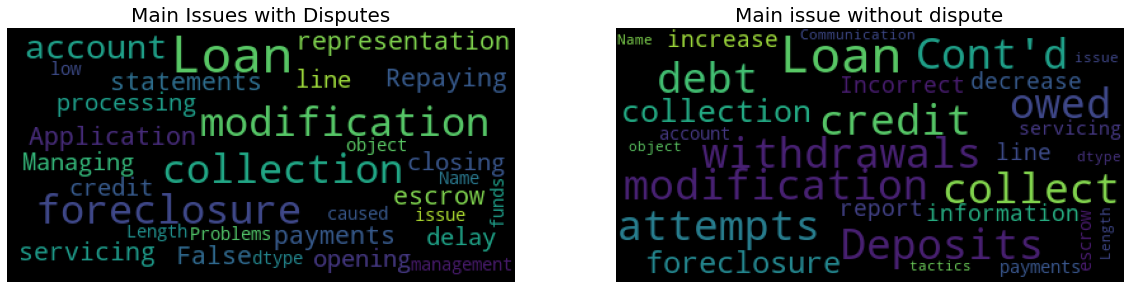

In [47]:
# implementing the word cloud

stopwords = set(STOPWORDS)

# main issue in disputes

disputes_issue = df['issue'].loc[df['consumer_disputed?'] == 'Yes']

disputed_wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, max_words = 200, max_font_size = 40, random_state = 42).generate(str(df['issue'].loc[df['consumer_disputed?']== 'Yes']))

nodispute_wordcloud = WordCloud(background_color = 'black', stopwords = stopwords, max_words = 200, max_font_size = 40, random_state = 42).generate(str(df['issue'].loc[df['consumer_disputed?']== 'No']))

# issue wordcloud with and without subplots

fig = plt.figure(figsize=(20, 12))
fig.add_subplot(221)
plt.imshow(disputed_wordcloud)
plt.title('Main Issues with Disputes', fontsize = 20)
plt.axis('off')

fig.add_subplot(222)
plt.imshow(nodispute_wordcloud)
plt.title('Main issue without dispute', fontsize = 20)
plt.axis('off')
plt.show()

(-0.5, 399.5, 199.5, -0.5)

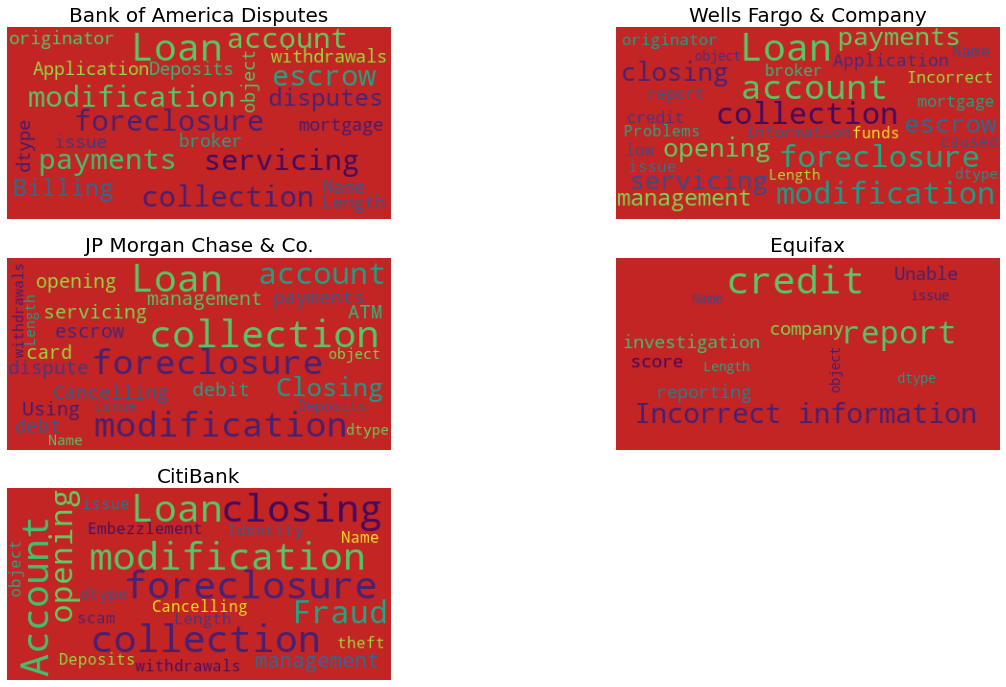

In [57]:
# searching wordcloud for the top 5 companies

boa_dis = df['issue'].loc[(df['consumer_disputed?'] == 'Yes') & (df['company']== 'Bank of America')]
wfc_dis = df['issue'].loc[(df['consumer_disputed?'] == 'Yes') & (df['company']== 'Wells Fargo & Company')]
jpm_dis = df['issue'].loc[(df['consumer_disputed?'] == 'Yes') & (df['company']== 'JPMorgan Chase & Co.')]
equi_dis = df['issue'].loc[(df['consumer_disputed?'] == 'Yes') & (df['company']== 'Equifax')]
citi_dis = df['issue'].loc[(df['consumer_disputed?'] == 'Yes') & (df['company']== 'Citibank')]

# create the subplot of the wordcloud

fig = plt.figure(figsize=(20,12))

# first subplot

plt.subplot(3, 2, 1)

boa_disputesed_wordcloud = WordCloud(background_color = 'rgb(195, 36, 36)', stopwords = stopwords, max_words=500, max_font_size=40, random_state=42).generate(str(boa_dis))
plt.imshow(boa_disputesed_wordcloud)
plt.title('Bank of America Disputes', fontsize = 20)
plt.axis('off')

# second subplot

plt.subplot(3, 2, 2)

wfc_disputesed_wordcloud = WordCloud(background_color = 'rgb(195, 36, 36)', stopwords = stopwords, max_words=500, max_font_size=40, random_state=42).generate(str(wfc_dis))
plt.imshow(wfc_disputesed_wordcloud)
plt.title('Wells Fargo & Company', fontsize = 20)
plt.axis('off')


# third subplot

plt.subplot(3, 2, 3)

jpm_disputesed_wordcloud = WordCloud(background_color = 'rgb(195, 36, 36)', stopwords = stopwords, max_words=500, max_font_size=40, random_state=42).generate(str(jpm_dis))
plt.imshow(jpm_disputesed_wordcloud)
plt.title('JP Morgan Chase & Co.', fontsize = 20)
plt.axis('off')

# fourth subplot

plt.subplot(3, 2, 4)

equi_disputesed_wordcloud = WordCloud(background_color = 'rgb(195, 36, 36)', stopwords = stopwords, max_words=500, max_font_size=40, random_state=42).generate(str(equi_dis))
plt.imshow(equi_disputesed_wordcloud)
plt.title('Equifax', fontsize = 20)
plt.axis('off')

# fifth subplot


plt.subplot(3, 2, 5)

citi_disputesed_wordcloud = WordCloud(background_color = 'rgb(195, 36, 36)', stopwords = stopwords, max_words=500, max_font_size=40, random_state=42).generate(str(citi_dis))
plt.imshow(citi_disputesed_wordcloud)
plt.title('CitiBank', fontsize = 20)
plt.axis('off')



In [54]:
df

,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zipcode,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed?,complaint_id,year_received,month_received
0,2013-08-30,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. Bancorp,CA,95993,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511074,2013,8
1,2013-08-30,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Wells Fargo & Company,CA,91104,NaN,NaN,Referral,09/03/2013,Closed with explanation,Yes,Yes,511080,2013,8
2,2013-08-30,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Wells Fargo & Company,NY,11764,NaN,NaN,Postal mail,09/18/2013,Closed with explanation,Yes,No,510473,2013,8
3,2013-08-30,Student loan,Non-federal student loan,Repaying your loan,Repaying your loan,NaN,NaN,"Navient Solutions, Inc.",MD,21402,NaN,NaN,Email,08/30/2013,Closed with explanation,Yes,Yes,510326,2013,8
4,2013-08-30,Debt collection,Credit card,False statements or representation,Attempted to collect wrong amount,NaN,NaN,Resurgent Capital Services L.P.,GA,30106,NaN,NaN,Web,08/30/2013,Closed with explanation,Yes,Yes,511067,2013,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555952,2014-07-01,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Bank of America,NaN,NaN,NaN,NaN,Referral,07/07/2014,Closed with explanation,Yes,No,919529,2014,7
555953,2014-07-01,Mortgage,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Residential Credit Solutions,NaN,NaN,"Older American, Servicemember",NaN,Referral,07/23/2014,Closed with explanation,No,No,918447,2014,7
555954,2012-07-10,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,BB&T Financial,NaN,NaN,NaN,NaN,Phone,11/18/2013,Closed with explanation,Yes,No,114550,2012,7
555955,2015-04-14,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,NaN,NaN,Global Recovery Group,NaN,NaN,NaN,NaN,Phone,04/14/2015,Untimely response,No,No,1329963,2015,4


In [66]:
dispute_presence = df.loc[df['consumer_disputed?'] == 'Yes']
print(dispute_presence.shape)
print()
cross_month = pd.crosstab(dispute_presence['state'], dispute_presence['company']).apply(lambda x : x/x.sum() * 100)


(112134, 20)



In [65]:
cross_month.head()

company,1st Alliance Lending,"1st Capital Mortgage, LLC",1st Franklin Financial Corporation,1st Maryland Mortgage Corporation,1st Midwest Mortgage Corp,"1st Money Center, Inc.","1st Priority Mortgage, Inc.",21st Mortgage Corporation,360 Mortgage,"3rd Generation, Inc.","4M Collections, LLC","A & S Collection Associates, Inc.","A+ Financial Services, Inc.","A.R.M. Solutions, Inc.","A/R CONCEPTS, INC.",AAA Collections,AALM Consulting Services LTD (International company),"ABA Recovery Service, Inc.",ABC Finance Co.,"ABC Financial Services, Inc.","AC Autopay, LLC","ACCELERATED COLLECTION SERVICE, INC",ACE Cash Express Inc.,"ACQ Holdings, LLC.",ACS Education Services,AES/PHEAA,"AFS Acceptance, LLC",AIH Receivables Management Inc.,"ALE Solutions, Inc.","ALEXANDER-ROSE ASSOC, INC.","AMCOL Systems, Inc.","APEX Asset Management, LLC","APPLE RECOVERY, LLC","AR Audit Services, Inc","AR Resources, Inc.",ARAKI-REGAN & ASSOCIATES LLC,ARM WNY LLC,"ARS National Services, Inc.","ATG Credit, LLC","Aargon Agency, Inc.",...,"Whetstone Partners, LLC",Whitehouse Law Firm LPA,Whitestone Financial Holdings LLC,Whitney Bank,"Wilber and Associates, P.C.","William C. Grossman Law, PLLC.","William D. Meeker Enterprises, Inc.","Williams & Fudge, Inc","Williams, Alexander & Associates, Inc","Williams, Rush & Associates, LLC",Williston Financial Group,"Wilson, Riley & Assoc",Windermere Mortgage Services Series LLC,Windham Professionals,"Wise Finance, LLC","Wolfe Financial, Inc.","Works & Lentz of Tulsa, Inc.","Works & Lentz, Inc",World Acceptance Corporation,World Omni Financial Corp.,"World Recovery Service, LLC","Worldwide Processing Group, LLC",Worth Finance Corporation,Wright & Lerch Attorneys At Law,"Wyndham Capital Mortgage, Inc.",Xoom,"Yakima County Credit Service, INC",Yale Mortgage Corporation,"ZENCO COLLECTION, LLC","ZOA, LLC",Zarvad III S.A.,"Zarzaur and Schwartz, PC","Zeller & Associates, LLC",Zenith Financial Network Inc,ZestFinance,Zions Bancorporation,Zions First National Bank,Zwicker & Associates,eCon Credit LP,iServe Trust
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AE,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AK,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AL,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0
AP,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
cross_month

company,1st Alliance Lending,"1st Capital Mortgage, LLC",1st Franklin Financial Corporation,1st Maryland Mortgage Corporation,1st Midwest Mortgage Corp,"1st Money Center, Inc.","1st Priority Mortgage, Inc.",21st Mortgage Corporation,360 Mortgage,"3rd Generation, Inc.","4M Collections, LLC","A & S Collection Associates, Inc.","A+ Financial Services, Inc.","A.R.M. Solutions, Inc.","A/R CONCEPTS, INC.",AAA Collections,AALM Consulting Services LTD (International company),"ABA Recovery Service, Inc.",ABC Finance Co.,"ABC Financial Services, Inc.","AC Autopay, LLC","ACCELERATED COLLECTION SERVICE, INC",ACE Cash Express Inc.,"ACQ Holdings, LLC.",ACS Education Services,AES/PHEAA,"AFS Acceptance, LLC",AIH Receivables Management Inc.,"ALE Solutions, Inc.","ALEXANDER-ROSE ASSOC, INC.","AMCOL Systems, Inc.","APEX Asset Management, LLC","APPLE RECOVERY, LLC","AR Audit Services, Inc","AR Resources, Inc.",ARAKI-REGAN & ASSOCIATES LLC,ARM WNY LLC,"ARS National Services, Inc.","ATG Credit, LLC","Aargon Agency, Inc.",...,"Whetstone Partners, LLC",Whitehouse Law Firm LPA,Whitestone Financial Holdings LLC,Whitney Bank,"Wilber and Associates, P.C.","William C. Grossman Law, PLLC.","William D. Meeker Enterprises, Inc.","Williams & Fudge, Inc","Williams, Alexander & Associates, Inc","Williams, Rush & Associates, LLC",Williston Financial Group,"Wilson, Riley & Assoc",Windermere Mortgage Services Series LLC,Windham Professionals,"Wise Finance, LLC","Wolfe Financial, Inc.","Works & Lentz of Tulsa, Inc.","Works & Lentz, Inc",World Acceptance Corporation,World Omni Financial Corp.,"World Recovery Service, LLC","Worldwide Processing Group, LLC",Worth Finance Corporation,Wright & Lerch Attorneys At Law,"Wyndham Capital Mortgage, Inc.",Xoom,"Yakima County Credit Service, INC",Yale Mortgage Corporation,"ZENCO COLLECTION, LLC","ZOA, LLC",Zarvad III S.A.,"Zarzaur and Schwartz, PC","Zeller & Associates, LLC",Zenith Financial Network Inc,ZestFinance,Zions Bancorporation,Zions First National Bank,Zwicker & Associates,eCon Credit LP,iServe Trust
state,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AA,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AE,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.262467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AK,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.524934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AL,0.0,0.0,44.444444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.262467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.894737,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.451613,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3.846154,6.25,0.0,11.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
AP,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [68]:
# share of most disputes for bank of america

df_boa = pd.DataFrame(cross_month['Bank of America']).reset_index().sort_values(by = 'Bank of America', ascending = False).round(2)


In [69]:
df_boa

,state,Bank of America
8,CA,20.22
13,FL,11.00
42,NY,5.78
53,TX,5.33
15,GA,4.82
...,...,...
6,AS,0.01
48,PW,0.00
28,MH,0.00
14,FM,0.00


In [75]:
df_boa = df_boa.rename(columns = {'Bank of America': 'share of complaints'})
df_boa

,state,share of complaints,text
8,CA,20.22,State code:CA<br>
13,FL,11.0,State code:FL<br>
42,NY,5.78,State code:NY<br>
53,TX,5.33,State code:TX<br>
15,GA,4.82,State code:GA<br>
...,...,...,...
6,AS,0.01,State code:AS<br>
48,PW,0.0,State code:PW<br>
28,MH,0.0,State code:MH<br>
14,FM,0.0,State code:FM<br>


In [88]:
#  Share of Most disputes for Bank of America.
df_boa = pd.DataFrame(cross_month['Bank of America']).reset_index().sort_values(by='Bank of America', ascending=False).round(2)
df_boa = df_boa.rename(columns={'Bank of America': 'share of complaints'})

for col in df_boa.columns:
    df_boa[col] = df_boa[col].astype(str)
    
    
scl = [[0.0, 'rgb(202, 202, 202)'],[0.2, 'rgb(253, 205, 200)'],[0.4, 'rgb(252, 169, 161)'], [0.6, 'rgb(247, 121, 108  )'],[0.8, 'rgb(255, 39, 39)'],[1.0, 'rgb(219, 0, 0)']]

df_boa['text'] = "State Code: " + df_boa['state'] + '<br>'

data = [ dict( type='choropleth', colorscale = scl, autocolorscale = False, locations = df_boa['state'], z = df_boa['share of complaints'], locationmode = 'USA-states', text = df_boa['text'], marker = dict( line = dict (color = 'rgb(255,255,255)', width = 2) ), colorbar = dict( title = "%"))]

layout = dict(
    title = 'Most Complaints by State <br> Bank of America',
    geo = dict(
        scope = 'usa',
        projection = dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data = data, layout = layout)
iplot(fig, filename='d3-cloropleth-map')

In [89]:
#  Share of Most disputes for Wells Fargo & Company.
df_wfc = pd.DataFrame(cross_month['Wells Fargo & Company']).reset_index().sort_values(by='Wells Fargo & Company', ascending=False).round(2)
df_wfc = df_wfc.rename(columns={'Wells Fargo & Company': 'share of complaints'})

for col in df_wfc.columns:
    df_wfc[col] = df_wfc[col].astype(str)
    
    
scl = [[0.0, 'rgb(202, 202, 202)'],[0.2, 'rgb(253, 205, 200)'],[0.4, 'rgb(252, 169, 161)'], [0.6, 'rgb(247, 121, 108  )'],[0.8, 'rgb(255, 39, 39)'],[1.0, 'rgb(219, 0, 0)']]

df_wfc['text'] = "State Code: " + df_wfc['state'] + '<br>'

data = [ dict( type='choropleth', colorscale = scl, autocolorscale = False, locations = df_wfc['state'], z = df_wfc['share of complaints'], locationmode = 'USA-states', text = df_wfc['text'], marker = dict( line = dict (color = 'rgb(255,255,255)', width = 2) ), colorbar = dict( title = "%"))]

layout = dict(
    title = 'Most Complaints by State <br> Wells Fargo & Company',
    geo = dict(
        scope = 'usa',
        projection = dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data = data, layout = layout)
iplot(fig, filename='d3-cloropleth-map')

In [96]:
df_jpm = pd.DataFrame(cross_month['JPMorgan Chase & Co.']).reset_index().sort_values(by="JPMorgan Chase & Co.", ascending=False).round(2)

In [95]:
df_jpm = df_jpm.rename(columns={'JPMorgan Chase & Co.': 'share of complaints'})

In [97]:
df_jpm

,state,JPMorgan Chase & Co.
8,CA,19.40
42,NY,11.34
13,FL,8.72
53,TX,6.39
20,IL,4.94
...,...,...
32,MP,0.00
28,MH,0.00
6,AS,0.00
4,AP,0.00


In [98]:
df_jpm = pd.DataFrame(cross_month['JPMorgan Chase & Co.']).reset_index().sort_values(by="JPMorgan Chase & Co.", ascending=False).round(2)
df_jpm = df_jpm.rename(columns={'JPMorgan Chase & Co.': 'share of complaints'})

for col in df_jpm.columns:
    df_jpm[col] = df_jpm[col].astype(str)
    
    
scl = [[0.0, 'rgb(202, 202, 202)'],[0.2, 'rgb(253, 205, 200)'],[0.4, 'rgb(252, 169, 161)'], [0.6, 'rgb(247, 121, 108  )'],[0.8, 'rgb(255, 39, 39)'],[1.0, 'rgb(219, 0, 0)']]


df_jpm['text'] = "State Code: " + df_jpm['state'] + '<br>'


data = [ dict( type='choropleth', colorscale = scl, autocolorscale = False, locations = df_jpm['state'], z = df_jpm['share of complaints'], locationmode = 'USA-states', text = df_jpm['text'], marker = dict(line = dict ( color = 'rgb(255,255,255)', width = 2 ) ), colorbar = dict( title = "%")) ]

layout = dict(
    title = 'Most Complaints by State <br> JPMorgan Chase & Co.',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')


In [100]:
df_eq = pd.DataFrame(cross_month['Equifax']).reset_index().sort_values(by='Equifax', ascending=False).round(2)
df_eq = df_eq.rename(columns = {'Equifax': 'share of complaints'})

for col in df_eq.columns:
    df_eq[col] = df_eq[col].astype(str)
    
    
scl = [[0.0, 'rgb(202, 202, 202)'], [0.2, 'rgb(253, 205, 200)'], [0.4, 'rgb(252, 169, 161)'], [0.6, 'rgb(247, 121, 108  )'], [0.8, 'rgb(255, 39, 39)'], [1.0, 'rgb(219, 0, 0)']]


df_eq['text'] = "State Code: " + df_eq['state'] + '<br>'


data = [ dict( type='choropleth', colorscale = scl, autocolorscale = False, locations = df_eq['state'], z = df_eq['share of complaints'], locationmode = 'USA-states', text = df_eq['text'], marker = dict(line = dict ( color = 'rgb(255,255,255)', width = 2 ) ), colorbar = dict( title = "%")) ]

layout = dict(
    title = 'Most Complaints by State <br> Equifax',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data = data, layout = layout)
iplot(fig, filename='d3-cloropleth-map')


In [101]:
df_citi = pd.DataFrame(cross_month["Citibank"]).reset_index().sort_values(by="Citibank", ascending=False).round(2)
df_citi = df_citi.rename(columns = {'Citibank': 'share of complaints'})

for col in df_citi.columns:
    df_citi[col] = df_citi[col].astype(str)
    
    
scl = [[0.0, 'rgb(202, 202, 202)'], [0.2, 'rgb(253, 205, 200)'], [0.4, 'rgb(252, 169, 161)'], [0.6, 'rgb(247, 121, 108  )'], [0.8, 'rgb(255, 39, 39)'], [1.0, 'rgb(219, 0, 0)']]


df_citi['text'] = "State Code: " + df_citi['state'] + '<br>'


data = [ dict( type='choropleth', colorscale = scl, autocolorscale = False, locations = df_eq['state'], z = df_citi['share of complaints'], locationmode = 'USA-states', text = df_citi['text'], marker = dict( line = dict ( color = 'rgb(255,255,255)', width = 2 ) ), colorbar = dict( title = "%")) ]

layout = dict(
    title = 'Most Complaints by State <br> CitiBank',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')